In [49]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
from sklearn import linear_model

In [50]:
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv"
download = requests.get(url).content

In [51]:
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head(2)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3


In [52]:
df.rename(columns={'Car Model':'CarModel', 'Mileage':'Mileage', 'Sell Price($)':'SellPrice', 'Age(yrs)':'Age'}, inplace=True)

In [53]:
df.columns

Index(['CarModel', 'Mileage', 'SellPrice', 'Age'], dtype='object')

In [16]:
df.head(2)

,CarModel,Mileage,SellPrice,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3


In [18]:
dummies = pd.get_dummies(df.CarModel)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [19]:
merged = pd.concat([df,dummies], axis='columns')
merged

,CarModel,Mileage,SellPrice,Age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [20]:
final = merged.drop(['CarModel','Mercedez Benz C class'], axis='columns')
final

,Mileage,SellPrice,Age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


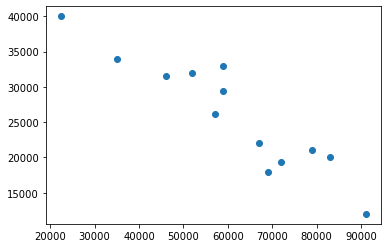

In [57]:
%matplotlib inline
plt.scatter(df['Mileage'], df['SellPrice'])

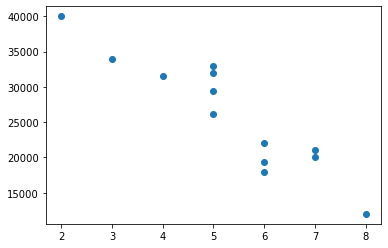

In [58]:
%matplotlib inline
plt.scatter(df['Age'], df['SellPrice'])

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
X = final.drop('SellPrice',axis='columns')
X

,Mileage,Age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [63]:
y = final.SellPrice
y


0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: SellPrice, dtype: int64

In [64]:
model.fit(X,y)

LinearRegression()

In [65]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [66]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

In [67]:
model.score(X,y)

0.9417050937281083

In [68]:
df 

,CarModel,Mileage,SellPrice,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
dfle = df
dfle.CarModel = le.fit_transform(dfle.CarModel)
dfle

,CarModel,Mileage,SellPrice,Age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [41]:
X = dfle[['CarModel','Mileage','Age']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [47]:
y = dfle.SellPrice
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: SellPrice, dtype: int64